In [25]:
from numpy import *

import pandas as pd
import numpy as np
import operator


def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    lables = ['A', 'A', 'B', 'B']
    return group, lables

group, lables = createDataSet()

In [26]:
group, labels = createDataSet()

In [27]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    print distances
    print sortedDistIndicies
    classCount ={}
    for i in range(k):
        voteLabel = lables[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
    print classCount
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [31]:
# 预测原点的分类
classify0([0, 0], group, labels, 3)

[ 1.48660687  1.41421356  0.          0.1       ]
[2 3 1 0]
{'A': 1, 'B': 2}


'B'

In [29]:
# 读取datingTestSet.txt
# 修改了书中代码，用pandas来实现
# 没错就是因为懒！
def file2matrix(filename):
    data = pd.read_table(filename, header=-1)
    returnMat = data.ix[:, 0:3].values
    data.ix[:, 3] = data.ix[:, 3].astype(int)
    classLabelVector = data.ix[:, 3].values
    return returnMat, classLabelVector   
    

In [30]:
datingDataMat, datingLables = file2matrix('datingTestSet2.txt')

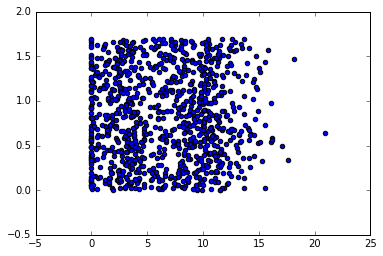

In [24]:
# 绘图（密集恐惧症受难时间）
# 第二、三列特征值
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
plt.show()

%matplotlib inline

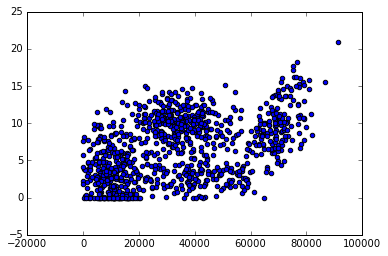

In [32]:
# 绘图（密集恐惧症受难时间）
# 第一、二列特征值
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1])
plt.show()

%matplotlib inline